In [25]:
from pymilvus import Collection, connections
from RAG_Functions import *
import time
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import matplotlib.pyplot as plt
import numpy as np

## Load models

In [26]:
# embedding model
embedding_model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")
input_text = "Does Apple prioritize the protection of user data?"

## Connect to Milvus collection 

In [27]:
connections.connect(host='localhost', port='19530')
collection_name = 'text_embeddings'
collection = Collection(name=collection_name)

## Index comparison

### IVF_FLAT

In [28]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "IVF_FLAT",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
18.901261806488037


In [29]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_IVF_FLAT = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_IVF_FLAT)

(['iCloud: Apple requires its partners to protect your personal data.', 'iCloud: Protection of Personal Data at Apple At Apple, we believe that great privacy rests on great security.', 'AppleMediaServicesDEPRECATED: APPLE SHALL USE REASONABLE EFFORTS TO PROTECT INFORMATION SUBMITTED BY YOU IN CONNECTION WITH THE SERVICES, BUT YOU AGREE THAT YOUR SUBMISSION OF SUCH INFORMATION IS AT YOUR SOLE RISK, AND YOU HEREBY RELEASE APPLE FROM ANY AND ALL LIABILITY TO YOU FOR ANY LOSS OR LIABILITY RELATING TO SUCH INFORMATION IN ANY WAY.', 'iCloud: For certain sensitive information, Apple uses end-to-end encryption.', 'iCloud: To protect individuals, employees, and Apple and for loss prevention and to prevent fraud, including to protect individuals, employees, and Apple for the benefit of all our users, and prescreening or scanning uploaded content for potentially illegal content, including child sexual exploitation material.', 'iCloud: The personal data Apple collects depends on how you interact w

### FLAT

In [30]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "FLAT",
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
0.5263512134552002


In [31]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_FLAT = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_FLAT)

(['iCloud: Apple requires its partners to protect your personal data.', 'iCloud: Protection of Personal Data at Apple At Apple, we believe that great privacy rests on great security.', 'AppleMediaServicesDEPRECATED: APPLE SHALL USE REASONABLE EFFORTS TO PROTECT INFORMATION SUBMITTED BY YOU IN CONNECTION WITH THE SERVICES, BUT YOU AGREE THAT YOUR SUBMISSION OF SUCH INFORMATION IS AT YOUR SOLE RISK, AND YOU HEREBY RELEASE APPLE FROM ANY AND ALL LIABILITY TO YOU FOR ANY LOSS OR LIABILITY RELATING TO SUCH INFORMATION IN ANY WAY.', 'iCloud: For certain sensitive information, Apple uses end-to-end encryption.', 'iCloud: To protect individuals, employees, and Apple and for loss prevention and to prevent fraud, including to protect individuals, employees, and Apple for the benefit of all our users, and prescreening or scanning uploaded content for potentially illegal content, including child sexual exploitation material.', 'iCloud: The personal data Apple collects depends on how you interact w

### HNSW

In [32]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "HNSW",
    "params": {"M": 128, "efConstruction": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
93.06880283355713


In [33]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_HNSW = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_HNSW)

(['iCloud: Apple requires its partners to protect your personal data.', 'iCloud: Protection of Personal Data at Apple At Apple, we believe that great privacy rests on great security.', 'AppleMediaServicesDEPRECATED: APPLE SHALL USE REASONABLE EFFORTS TO PROTECT INFORMATION SUBMITTED BY YOU IN CONNECTION WITH THE SERVICES, BUT YOU AGREE THAT YOUR SUBMISSION OF SUCH INFORMATION IS AT YOUR SOLE RISK, AND YOU HEREBY RELEASE APPLE FROM ANY AND ALL LIABILITY TO YOU FOR ANY LOSS OR LIABILITY RELATING TO SUCH INFORMATION IN ANY WAY.', 'iCloud: For certain sensitive information, Apple uses end-to-end encryption.', 'iCloud: To protect individuals, employees, and Apple and for loss prevention and to prevent fraud, including to protect individuals, employees, and Apple for the benefit of all our users, and prescreening or scanning uploaded content for potentially illegal content, including child sexual exploitation material.', 'iCloud: The personal data Apple collects depends on how you interact w

### IVF_SQ8

In [34]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "IVF_SQ8",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
10.225025653839111


In [35]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_IVF_SQ8 = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_IVF_SQ8)

(['iCloud: Apple requires its partners to protect your personal data.', 'iCloud: Protection of Personal Data at Apple At Apple, we believe that great privacy rests on great security.', 'AppleMediaServicesDEPRECATED: APPLE SHALL USE REASONABLE EFFORTS TO PROTECT INFORMATION SUBMITTED BY YOU IN CONNECTION WITH THE SERVICES, BUT YOU AGREE THAT YOUR SUBMISSION OF SUCH INFORMATION IS AT YOUR SOLE RISK, AND YOU HEREBY RELEASE APPLE FROM ANY AND ALL LIABILITY TO YOU FOR ANY LOSS OR LIABILITY RELATING TO SUCH INFORMATION IN ANY WAY.', 'iCloud: For certain sensitive information, Apple uses end-to-end encryption.', 'iCloud: To protect individuals, employees, and Apple and for loss prevention and to prevent fraud, including to protect individuals, employees, and Apple for the benefit of all our users, and prescreening or scanning uploaded content for potentially illegal content, including child sexual exploitation material.', 'iCloud: The personal data Apple collects depends on how you interact w

### SCANN

In [36]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "SCANN",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
26.901768922805786


In [37]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_SCANN = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_SCANN)

(['AppleMediaServicesDEPRECATED: APPLE SHALL USE REASONABLE EFFORTS TO PROTECT INFORMATION SUBMITTED BY YOU IN CONNECTION WITH THE SERVICES, BUT YOU AGREE THAT YOUR SUBMISSION OF SUCH INFORMATION IS AT YOUR SOLE RISK, AND YOU HEREBY RELEASE APPLE FROM ANY AND ALL LIABILITY TO YOU FOR ANY LOSS OR LIABILITY RELATING TO SUCH INFORMATION IN ANY WAY.', 'iCloud: For certain sensitive information, Apple uses end-to-end encryption.', 'AppleServices: Apple takes the security of your personal information very seriously.', 'AppleServices: APPLE SHALL USE REASONABLE EFFORTS TO PROTECT INFORMATION SUBMITTED BY YOU IN CONNECTION WITH THE SERVICES, BUT YOU AGREE THAT YOUR SUBMISSION OF SUCH INFORMATION IS AT YOUR SOLE RISK, AND YOU HEREBY RELEASE APPLE FROM ANY AND ALL LIABILITY TO YOU FOR ANY LOSS OR LIABILITY RELATING TO SUCH INFORMATION IN ANY WAY.', 'AppleServices: to address user security, user privacy, or technical integrity concerns.', 'AppleServices: to address user security, user privacy, or

## Visualization

In [38]:
indexes = ['IVF_FLAT', 'FLAT', 'HNSW', 'IVF_SQ8', 'SCANN']
results = [top5_sentences_IVF_FLAT, top5_sentences_FLAT, top5_sentences_HNSW, top5_sentences_IVF_SQ8, top5_sentences_SCANN]
query_time = {}
distance = {}
for i, result in enumerate(results):
    query_time[indexes[i]] = result[3]
    distance[indexes[i]] = np.mean(result[2])
query_time

{'IVF_FLAT': 0.28273797035217285,
 'FLAT': 0.4428400993347168,
 'HNSW': 0.15721702575683594,
 'IVF_SQ8': 0.34076380729675293,
 'SCANN': 0.3287811279296875}

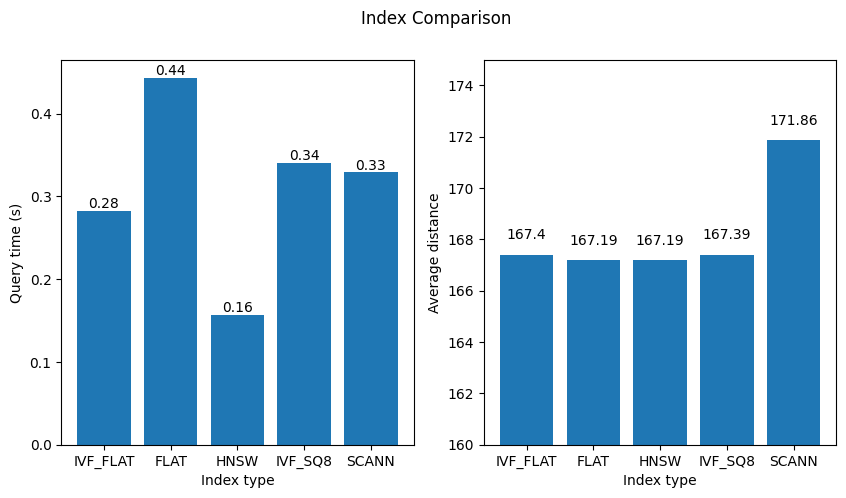

In [40]:
indexes = list(query_time.keys())
times = list(query_time.values())
distances = list(distance.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
bars1 = ax1.bar(indexes, times)
ax1.set_xlabel('Index type')
ax1.set_ylabel('Query time (s)')
for bar, value in zip(bars1, times):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value,2), ha='center', va='bottom')

bars2 = ax2.bar(indexes, distances)
ax2.set_ylim(160, 175)
ax2.set_xlabel('Index type')
ax2.set_ylabel('Average distance')
for bar, value in zip(bars2, distances):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, round(value,2), ha='center', va='bottom')

plt.suptitle('Index Comparison')
plt.show()